<a href="https://colab.research.google.com/github/pranjalrawat007/Econometrics/blob/main/MLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
from numpy.random import binomial, poisson, exponential, normal, uniform, gamma, seed
from numpy import pi, log, linspace, power, exp, prod
import matplotlib.pyplot as plt
from scipy.optimize import minimize


# Bernoulli

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: R

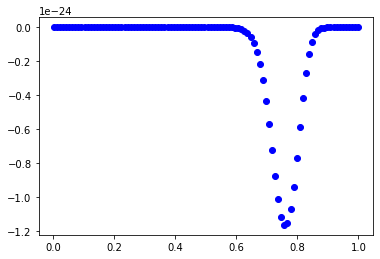

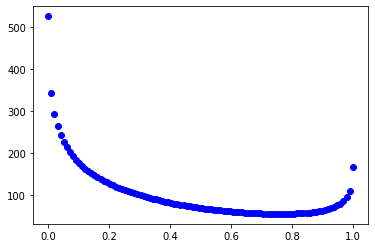

In [117]:
seed(1)
n, p = 1, 0.8
e = 1e-3
sample = binomial(n, p, 100)

#f(x) = p^x * (1-p)^1-x, x = 0, 1
#f(sample) = Prod p^x(i) * (1-p)^(1-x(i)),  x =0, 1
#logf(sample) = sum(x(i))logp + sum(1-x(i))*log(1-p)

def likelihood(p):
  return -prod(power(p,sample)*power(1-p,1-sample))

def loglikelihood(p):
  return -log(prod(power(p,sample)*power(1-p,1-sample)))

mle_estimates = []
for i in range(100):
  seed(i)
  sample = binomial(n, p, 100)
  mle_estimator = minimize(loglikelihood, 0.1).x
  mle_estimates.append(mle_estimator)

for i in linspace(e,1-e,100):
  plt.figure(1)
  plt.scatter(i,likelihood(i), c='b')
  plt.figure(2)
  plt.scatter(i,loglikelihood(i), c='b')
plt.show()

# Exponential

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning:

divide by zero encountered in log



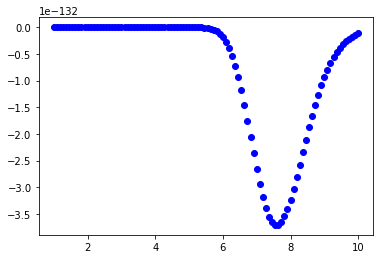

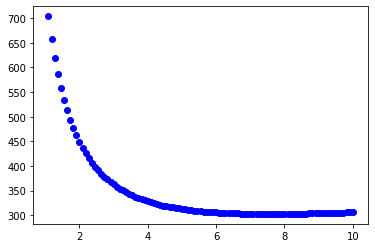

In [115]:
seed(1)
b=8
e = 1e-3
sample = exponential(b, 100) 

#f(x) = 1/beta * exp(-x/beta), x>0
#L(x;b) = Prod 1/beta * exp(-x(i)/beta),  x =0, 1
#l(x;b) = nlogp - sum(x(i))/b

def likelihood(b):
  return -prod(1/b*exp(-sample/b))

def loglikelihood(b):
  return -log(prod(1/b*exp(-sample/b)))

for i in linspace(1,10,100):
  plt.figure(1)
  plt.scatter(i,likelihood(i), c='b')
  plt.figure(2)
  plt.scatter(i,loglikelihood(i), c='b')
plt.show()

In [ ]:
seed(1)
b=8
e = 1e-3
sample = exponential(b, 100) 

#f(x) = 1/beta * exp(-x/beta), x>0
#L(x;b) = Prod 1/beta * exp(-x(i)/beta),  x =0, 1
#l(x;b) = nlogp - sum(x(i))/b

def likelihood(b):
  return prod(1/b*exp(-sample/b))

def loglikelihood(b):
  return log(prod(1/b*exp(-sample/b)))

for i in linspace(1,10,100):
  plt.figure(1)
  plt.scatter(i,likelihood(i), c='b')
  plt.figure(2)
  plt.scatter(i,loglikelihood(i), c='b')
plt.show()

# Normal[link text](https://)

In [ ]:
from numpy.random import normal, seed
from numpy import pi, log
import matplotlib.pyplot as plt

seed(1)
mean, stdev = 10, 2
sample = normal(mean, var, 100)

def loglikelihood(param):
  N = sample.shape[0]
  return -(-N/2*np.log(2*pi*param[1]**2)-(1/2/param[1]**2)*sum((sample - param[0])**2))

from scipy.optimize import minimize
x0 = [0, 1]
res = minimize(loglikelihood, x0)
mle_estimator = res.x

mean_estimates = []
var_estimates = []
for i in range(100):
  seed(i)
  sample = normal(mean, var, 100)
  mle_estimator = minimize(loglikelihood, x0).x
  mean_estimates.append(mle_estimator[0])
  var_estimates.append(mle_estimator[1])

plt.figure(1)
plt.hist(mean_estimates)
plt.figure(2)
plt.hist(var_estimates)
print(np.mean(mean_estimates))
print(np.mean(var_estimates))

x = np.linspace(5, 15, 20)
y = np.linspace(0.5, 1.5, 20)

xs = []
ys = []
zs = []
for a in x:
  for b in y: 
    xs.append(a)
    ys.append(b)
    zs.append(loglikelihood([a, b]))

import plotly.express as px
import pandas as pd
df = px.data.iris()
df = pd.DataFrame(np.c_[np.c_[xs, ys], zs], columns = ['mean', 'var', 'loglikelihood'])
fig = px.scatter_3d(df, x='mean', y='var', z='loglikelihood')
fig.show()

In [145]:
import plotly.express as px
import pandas as pd
df = px.data.iris()
df = pd.DataFrame(np.c_[np.c_[xs, ys], zs], columns = ['mean', 'var', 'loglikelihood'])
fig = px.scatter_3d(df, x='mean', y='var', z='loglikelihood')
fig.show()

In [112]:
import numpy as np

def func(x, y):
    return np.sin(y * x)

xaxis = np.linspace(0, 4, 2)
yaxis = np.linspace(-1, 1, 2)
x, y = np.meshgrid(xaxis, yaxis)
result = func(x, y)

y

array([[-1., -1.],
       [ 1.,  1.]])

In [105]:
from numpy.random import binomial, seed
from math import factorial
from numpy import pi, log
import matplotlib.pyplot as plt

seed(1)
n, p = 10, 0.5
sample = binomial(n, p, 100)

factorial(10)

def pmf(n, p, x):
  return factorial(n)/(factorial(n-x)*factorial(x)) * p ** x * (1-p) ** (n-x)


pmf(10, 0.4, 4)

def loglikelihood(param):
  N = sample.shape[0]
  sum = 0
  for i, x in enumerate(sample):
    sum += log(pmf(param[0], param[1], x))
  return -sum

from scipy.optimize import minimize
x0 = [10, 0.8]
res = minimize(loglikelihood, x0)
mle_estimator = res.x



ValueError: ignored

In [ ]:
from numpy.random import binomial, seed
from numpy.math import factorial
from numpy import pi, log
import matplotlib.pyplot as plt

seed(1)
n, p = 10, 0.5
sample = binomial(n, p, 100)

def pmf(n, p, x):
  factorial(n, x)
  
  return 
def loglikelihood(param):
  N = sample.shape[0]
  return -(-N/2*np.log(2*pi*param[1]**2)-(1/2/param[1]**2)*sum((sample - param[0])**2))

from scipy.optimize import minimize
x0 = [0, 1]
res = minimize(loglikelihood, x0)
mle_estimator = res.x

mean_estimates = []
var_estimates = []
for i in range(100):
  seed(i)
  sample = normal(mean, var, 1000)
  mle_estimator = minimize(loglikelihood, x0).x
  mean_estimates.append(mle_estimator[0])
  var_estimates.append(mle_estimator[1])

plt.figure(1)
plt.hist(mean_estimates)
plt.figure(2)
plt.hist(var_estimates)
print(np.mean(mean_estimates))
print(np.mean(var_estimates))